# chap3. 회귀 알고리즘과 모델 규제

## k-최근접 이웃

- 분류와 회귀로 나뉘는 지도 학습 알고리즘 중, 회귀에 속한다.
- 회귀 :: 두 변수 사이의 상관관계를 분석하는 방법

### 데이터 준비

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 받기
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

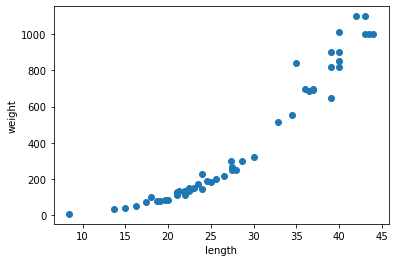

In [4]:
# 데이터의 산점도 확인

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [11]:
# 데이터의 모양 바꾸기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 결정계수

In [12]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [13]:
knr.score(train_input, train_target)

0.9698823289099254

In [14]:
from sklearn.metrics import mean_absolute_error

# 타겟과 예측의 절댓값 오차를 평균하여 반환(mean_absolute_error)
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

### 과대적합 vs 과소적합

- 과대적합: 훈련 세트에서 점수가 좋았는데 테스트 세트에서 점수가 나쁜 경우
- 과소적합: 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우

In [24]:
knr.n_neighbors = 5

knr.score(train_input, train_target)

0.9698823289099254

In [25]:
knr.score(test_input, test_target)

0.992809406101064

In [26]:
# 새로운 참고 데이터 값으로 새로운 학습
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [27]:
knr.score(train_input, train_target) # 아까보다 점수가 증가

0.9804899950518966

In [28]:
knr.score(test_input, test_target) # 아까보다 감소 -> 결과적으로 비슷해 짐. 아까보다 차이가 줄었음 -> 더 나은 학습이었다.

0.9746459963987609

## 선형 회귀

### k-최근접 이웃의 한계

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [32]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [40]:
print(knr.predict([[50]]))

[1033.33333333]


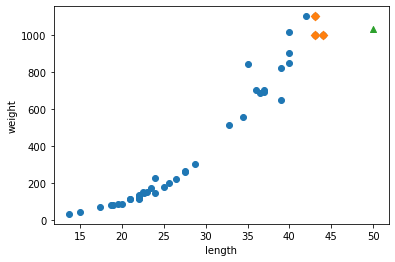

In [43]:
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [45]:
np.mean(train_target[indexes]) 
# 여기서 문제점을 발견, 특정한 값을 예측을 할때 참고 데이터의 평균으로 값이 매겨지는데 다음과 같이 데이터의 값과 구하고자하는 데이터가 차이가 큰 경우 경향성을 무시하고 결과가 나올 수 있다.

1033.3333333333333

In [46]:
knr.predict([[100]]) # 50과 같은 결과가 나왔음, 말이 되지 않는다. -> k 최근접 회귀의 문제점

array([1033.33333333])

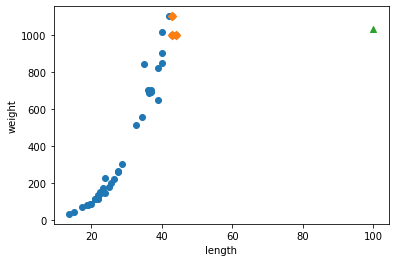

In [48]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형회귀

- 특성이 하나인 경우 직선을 학습하는 알고리즘

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

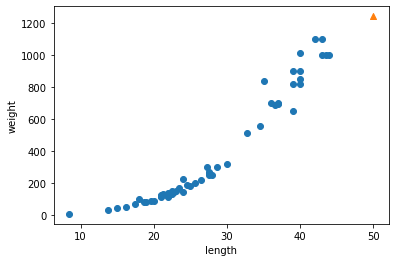

In [50]:
plt.scatter(perch_length, perch_weight)
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [51]:
# lr이 찾은 기울기와 절편
print(lr.coef_, lr.intercept_)

[39.01714496] -709.018644953547


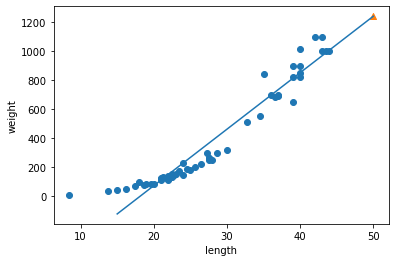

In [53]:
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_ +lr.intercept_]) # 학습된 선형 모델의 그래프
plt.scatter(perch_length, perch_weight)
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [56]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) # 문제가 있다. 테스트 셋과 훈련 셋의 차이가 크다. -> 과대적합

0.9398463339976041
0.8247503123313562


### 다항회귀 -> 1차 그래프가 아닌 고차항으로 계산

- 길이를 x로 하고 무게를 y로 하는 이차방정식을 풀기 위해 제곱을 한 항을 새로 만들어 준다.

In [57]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [58]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [61]:
lr.fit(train_poly, train_target)

LinearRegression()

In [62]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [63]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278293


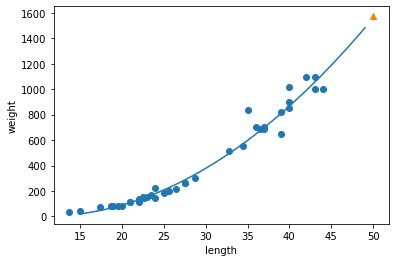

In [65]:
point = np.arange(15, 50)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(train_input, train_target)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [68]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target)) # 훨씬 더 좋아진 결과

0.9706807451768623
0.9775935108325122
